In [272]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = 300
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [273]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [274]:
#Outlier detection
def zscore(df, col, threshold=3):
    try:
        df[col]
    except:
        raise Exception('Column not found in data frame')
    try:
        mask = df[col].notnull() #Eliminate nulls. Otherwise zscore func returns null
        mycol = df[mask][col].copy()
        z = pd.Series(np.abs(stats.zscore(mycol)))
    except:
        raise ValueError('Column must be numeric')

    ret = pd.concat([mycol,z],axis=1)
    ret = ret.reset_index()
    ret.columns = [['index','value','zscore']]

    # Return index and value of data frame rows which z-scrore gt 3
    mask2 = np.array(ret['zscore'] > threshold)
    return ret[mask2]

In [275]:
train = train[train['GrLivArea']<4000]
#train2.drop([1298], inplace=True)

### Feature Engineering

- Sum of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' equals to 'TotalBsmtSF'. Use only 'TotalBsmtSF'. Drop others.

In [270]:
# Bsmt
BsmtSumSF = train[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']].sum(axis=1)
print((train['TotalBsmtSF'] == BsmtSumSF).all())
train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)
test.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

True


- LotArea can be defined as LotFrontage multiplied by width of the Lot. Their usage in the linear regressions may cause Multicolliniarity problem. Choose LotFrontage which has the highest correlation to target. Drop LotArea.

LotFrontage    1.00000
1stFlrSF       0.39840
LotArea        0.38757
Name: LotFrontage, dtype: float64


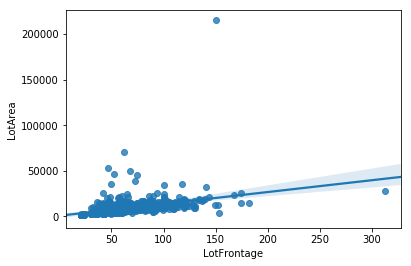

In [271]:
# LotFrontage vs. LotArea
print(train.corr()['LotFrontage'].sort_values(ascending=False).head(3))
sns.regplot(x='LotFrontage', y='LotArea', data=train)

#train.drop(['LotArea'], axis=1, inplace=True)
#test.drop(['LotArea'], axis=1, inplace=True)

- Sum of '1stFlrSF','2ndFlrSF' and 'LowQualFinSF' equals to 'GrLivArea'. Use only 'GrLivArea'. Drop others.

In [221]:
house_sqft = train[['1stFlrSF','2ndFlrSF','LowQualFinSF']].sum(axis=1)
(house_sqft == train['GrLivArea']).all()
train.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1, inplace=True)
test.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'], axis=1, inplace=True)

- 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch' can be summed to 'TotalPorchSF'. Use newly created variable. Drop others.

In [222]:
train['TotalPorchSF'] = train[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
test['TotalPorchSF'] = test[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
train.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis=1, inplace=True)
test.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis=1, inplace=True)

- Some categorical variables have NA values because they lack of the feature mentioned by the variable. This is actually a state of 'absence' so that they should be replaced by strings.

    - Alley -> 'NoAlley'
    - BsmtQual -> 'NoBsmt'
    - BsmtCond -> 'NoBsmt'
    - BsmtExposure -> 'NoBsmt'
    - BsmtFinType1 -> 'NoBsmt'
    - BsmtFinType2 -> 'NoBsmt'
    - FireplaceQu -> 'NoFirePl'
    - GarageType -> 'NoGarage'
    - GarageFinish -> 'NoGarage'
    - GarageQual -> 'NoGarage'
    - GarageCond -> 'NoGarage'
    - PoolQC -> 'NoPool'
    - Fence -> 'NoFence'

In [276]:
train['Alley'].fillna('NoAlley', inplace = True)
test['Alley'].fillna('NoAlley', inplace = True)
train['BsmtQual'].fillna('NoBsmt', inplace = True)
test['BsmtQual'].fillna('NoBsmt', inplace = True)
train['BsmtCond'].fillna('NoBsmt', inplace = True)
test['BsmtCond'].fillna('NoBsmt', inplace = True)
train['BsmtExposure'].fillna('NoBsmt', inplace = True)
test['BsmtExposure'].fillna('NoBsmt', inplace = True)
train['BsmtFinType1'].fillna('NoBsmt', inplace = True)
test['BsmtFinType1'].fillna('NoBsmt', inplace = True)
train['BsmtFinType2'].fillna('NoBsmt', inplace = True)
test['BsmtFinType2'].fillna('NoBsmt', inplace = True)
train['FireplaceQu'].fillna('NoFirePl', inplace = True)
test['FireplaceQu'].fillna('NoFirePl', inplace = True)
train['GarageType'].fillna('NoGarage', inplace = True)
test['GarageType'].fillna('NoGarage', inplace = True)
train['GarageFinish'].fillna('NoGarage', inplace = True)
test['GarageFinish'].fillna('NoGarage', inplace = True)
train['GarageQual'].fillna('NoGarage', inplace = True)
test['GarageQual'].fillna('NoGarage', inplace = True)
train['GarageCond'].fillna('NoGarage', inplace = True)
test['GarageCond'].fillna('NoGarage', inplace = True)
train['PoolQC'].fillna('NoPool', inplace = True)
test['PoolQC'].fillna('NoPool', inplace = True)
train['Fence'].fillna('NoFence', inplace = True)
test['Fence'].fillna('NoFence', inplace = True)
train['MiscFeature'].fillna('MiscFeature', inplace = True)
test['MiscFeature'].fillna('MiscFeature', inplace = True)

- 'MiscFeature' has too many Nulls. Drop.

In [150]:
#train.drop(['MiscFeature', 'PoolQC'],inplace=True,axis=1)
#test.drop(['MiscFeature', 'PoolQC'],inplace=True,axis=1)

In [224]:
train.corr()['SalePrice'].sort_values(ascending=False).head(25)

SalePrice       1.000000
OverallQual     0.800858
GrLivArea       0.720516
GarageCars      0.649256
TotalBsmtSF     0.646584
GarageArea      0.636964
FullBath        0.559048
TotRmsAbvGrd    0.537462
YearBuilt       0.535279
YearRemodAdd    0.521428
GarageYrBlt     0.499230
MasVnrArea      0.478862
Fireplaces      0.466765
LotFrontage     0.356773
WoodDeckSF      0.322538
HalfBath        0.282925
LotArea         0.269866
BsmtFullBath    0.235697
TotalPorchSF    0.206433
BedroomAbvGr    0.160542
MoSold          0.056797
PoolArea        0.032819
MiscVal        -0.021097
YrSold         -0.023694
Id             -0.027455
Name: SalePrice, dtype: float64

In [251]:
train.isnull().sum().sort_values(ascending=False).head(10)

SalePrice      0
Heating        0
RoofStyle      0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
dtype: int64

In [252]:
test.isnull().sum().sort_values(ascending=False).head(15)

SaleCondition    0
SaleType         0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
dtype: int64

In [253]:
train.skew().sort_values(ascending=False)

MiscVal          24.443364
PoolArea         17.522613
LotArea          12.587561
3SsnPorch        10.289866
LowQualFinSF      8.998564
KitchenAbvGr      4.481366
BsmtFinSF2        4.248587
BsmtHalfBath      4.128967
ScreenPorch       4.115641
EnclosedPorch     3.084454
MasVnrArea        2.657499
OpenPorchSF       2.339846
LotFrontage       1.711457
SalePrice         1.565959
WoodDeckSF        1.551271
MSSubClass        1.406366
BsmtUnfSF         0.921759
1stFlrSF          0.867081
GrLivArea         0.835192
2ndFlrSF          0.777866
BsmtFinSF1        0.744855
OverallCond       0.690631
HalfBath          0.684223
TotRmsAbvGrd      0.661416
Fireplaces        0.632678
BsmtFullBath      0.591152
TotalBsmtSF       0.486395
MoSold            0.217883
BedroomAbvGr      0.215067
OverallQual       0.183871
GarageArea        0.132991
YrSold            0.093214
FullBath          0.017694
Id                0.001342
GarageCars       -0.343475
YearRemodAdd     -0.499831
YearBuilt        -0.610087
G

- Missing Value Imputation

In [277]:
# Fill NA with median
med_GarageCars = test['GarageCars'].median()
med_GarageArea = test['GarageArea'].median()
med_TotalBsmtSF = test['TotalBsmtSF'].median()
med_GarageYrBlt = test['GarageYrBlt'].median()
med_MasVnrArea = test['MasVnrArea'].median()
med_LotFrontage = test['LotFrontage'].median()
med_LotFrontage = test['BsmtFullBath'].median()
med_LotFrontage = test['BsmtHalfBath'].median()
med_BsmtUnfSF = test['BsmtUnfSF'].median()
med_BsmtFinSF2 = test['BsmtFinSF2'].median()
med_BsmtFinSF1 = test['BsmtFinSF1'].median()
test['GarageCars'].fillna(med_GarageCars, inplace = True)
test['GarageArea'].fillna(med_GarageArea, inplace = True)
test['TotalBsmtSF'].fillna(med_TotalBsmtSF, inplace = True)
test['GarageYrBlt'].fillna(med_GarageYrBlt, inplace = True)
test['MasVnrArea'].fillna(med_MasVnrArea, inplace = True)
test['LotFrontage'].fillna(med_LotFrontage, inplace = True)
test['BsmtFullBath'].fillna(med_LotFrontage, inplace = True)
test['BsmtHalfBath'].fillna(med_LotFrontage, inplace = True)
test['BsmtUnfSF'].fillna(med_BsmtUnfSF, inplace = True)
test['BsmtFinSF2'].fillna(med_BsmtFinSF2, inplace = True)
test['BsmtFinSF1'].fillna(med_BsmtFinSF1, inplace = True)



med_GarageYrBlt_tr = train['GarageYrBlt'].median()
med_MasVnrArea_tr = train['MasVnrArea'].median()
med_LotFrontage_tr = train['LotFrontage'].median()
train['GarageYrBlt'].fillna(med_GarageYrBlt_tr, inplace = True)
train['MasVnrArea'].fillna(med_MasVnrArea_tr, inplace = True)
train['LotFrontage'].fillna(med_LotFrontage_tr, inplace = True)

# NA may mean 'Non-existant'. Impute with 'None'
train['MasVnrType'].fillna('None', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)



# Impute with the most common class.
train['Electrical'].fillna(train['Electrical'].value_counts().index[0], inplace = True)
test['Electrical'].fillna(test['Electrical'].value_counts().index[0], inplace = True)

# Extra null columns in the test dataset. Impute with the most common class.
test['KitchenQual'].fillna(test['KitchenQual'].value_counts().index[0], inplace = True)
test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0], inplace = True)
test['Utilities'].fillna(test['Utilities'].value_counts().index[0], inplace = True)
test['Functional'].fillna(test['Functional'].value_counts().index[0], inplace = True)
test['SaleType'].fillna(test['SaleType'].value_counts().index[0], inplace = True)
test['Exterior1st'].fillna(test['Exterior1st'].value_counts().index[0], inplace = True)
test['Exterior2nd'].fillna(test['Exterior2nd'].value_counts().index[0], inplace = True)
test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0], inplace = True)
test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0], inplace = True)
test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0], inplace = True)
test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0], inplace = True)

- Data Normalization/Standardization

In [231]:
train['YearBuilt'] = (train['YearBuilt'] - np.mean(train['YearBuilt'])) / np.std(train['YearBuilt'])
train['YearRemodAdd'] = (train['YearRemodAdd'] - np.mean(train['YearRemodAdd'])) / np.std(train['YearRemodAdd'])
train['GarageYrBlt'] = (train['GarageYrBlt'] - np.mean(train['GarageYrBlt'])) / np.std(train['GarageYrBlt'])
train['GarageArea'] = (train['GarageArea'] - np.mean(train['GarageArea'])) / np.std(train['GarageArea'])
train['GrLivArea'] = np.log(train['GrLivArea'])
train['TotalBsmtSF'] = (train['TotalBsmtSF'] - np.mean(train['TotalBsmtSF'])) / np.std(train['TotalBsmtSF'])
#train['1stFlrSF'] = np.log(train['1stFlrSF'])
train['MasVnrArea'] = (train['MasVnrArea'] - np.mean(train['MasVnrArea'])) / np.std(train['MasVnrArea'])
#train['BsmtFinSF1'] = (train['BsmtFinSF1'] - np.mean(train['BsmtFinSF1'])) / np.std(train['BsmtFinSF1'])
test['YearBuilt'] = (test['YearBuilt'] - np.mean(test['YearBuilt'])) / np.std(test['YearBuilt'])
test['YearRemodAdd'] = (test['YearRemodAdd'] - np.mean(test['YearRemodAdd'])) / np.std(test['YearRemodAdd'])
test['GarageYrBlt'] = (test['GarageYrBlt'] - np.mean(test['GarageYrBlt'])) / np.std(test['GarageYrBlt'])
test['GarageArea'] = (test['GarageArea'] - np.mean(test['GarageArea'])) / np.std(test['GarageArea'])
test['GrLivArea'] = np.log(test['GrLivArea'])
test['TotalBsmtSF'] = (test['TotalBsmtSF'] - np.mean(test['TotalBsmtSF'])) / np.std(test['TotalBsmtSF'])
#test['1stFlrSF'] = np.log(test['1stFlrSF'])
test['MasVnrArea'] = (test['MasVnrArea'] - np.mean(test['MasVnrArea'])) / np.std(test['MasVnrArea'])
#test['BsmtFinSF1'] = (test['BsmtF

train['MSSubClass'] = (train['MSSubClass'] - np.mean(train['MSSubClass'])) / np.std(train['MSSubClass'])
train['LotFrontage'] = (train['LotFrontage'] - np.mean(train['LotFrontage'])) / np.std(train['LotFrontage'])
train['LotArea'] = (train['LotArea'] - np.mean(train['LotArea'])) / np.std(train['LotArea'])
train['OverallQual'] = (train['OverallQual'] - np.mean(train['OverallQual'])) / np.std(train['OverallQual'])
train['OverallCond'] = (train['OverallCond'] - np.mean(train['OverallCond'])) / np.std(train['OverallCond'])
train['BsmtFullBath'] = (train['BsmtFullBath'] - np.mean(train['BsmtFullBath'])) / np.std(train['BsmtFullBath'])
train['BsmtHalfBath'] = (train['BsmtHalfBath'] - np.mean(train['BsmtHalfBath'])) / np.std(train['BsmtHalfBath'])
train['FullBath'] = (train['FullBath'] - np.mean(train['FullBath'])) / np.std(train['FullBath'])
train['HalfBath'] = (train['HalfBath'] - np.mean(train['HalfBath'])) / np.std(train['HalfBath'])
train['BedroomAbvGr'] = (train['BedroomAbvGr'] - np.mean(train['BedroomAbvGr'])) / np.std(train['BedroomAbvGr'])
train['KitchenAbvGr'] = (train['KitchenAbvGr'] - np.mean(train['KitchenAbvGr'])) / np.std(train['KitchenAbvGr'])
train['TotRmsAbvGrd'] = (train['TotRmsAbvGrd'] - np.mean(train['TotRmsAbvGrd'])) / np.std(train['TotRmsAbvGrd'])
train['Fireplaces'] = (train['Fireplaces'] - np.mean(train['Fireplaces'])) / np.std(train['Fireplaces'])
train['GarageCars'] = (train['GarageCars'] - np.mean(train['GarageCars'])) / np.std(train['GarageCars'])
train['WoodDeckSF'] = (train['WoodDeckSF'] - np.mean(train['WoodDeckSF'])) / np.std(train['WoodDeckSF'])
train['PoolArea'] = (train['PoolArea'] - np.mean(train['PoolArea'])) / np.std(train['PoolArea'])
train['MiscVal'] = (train['MiscVal'] - np.mean(train['MiscVal'])) / np.std(train['MiscVal'])
train['MoSold'] = (train['MoSold'] - np.mean(train['MoSold'])) / np.std(train['MoSold'])
train['YrSold'] = (train['YrSold'] - np.mean(train['YrSold'])) / np.std(train['YrSold'])
train['TotalPorchSF'] = (train['TotalPorchSF'] - np.mean(train['TotalPorchSF'])) / np.std(train['TotalPorchSF'])
test['MSSubClass'] = (test['MSSubClass'] - np.mean(test['MSSubClass'])) / np.std(test['MSSubClass'])
test['LotFrontage'] = (test['LotFrontage'] - np.mean(test['LotFrontage'])) / np.std(test['LotFrontage'])
test['OverallQual'] = (test['OverallQual'] - np.mean(test['OverallQual'])) / np.std(test['OverallQual'])
test['OverallCond'] = (test['OverallCond'] - np.mean(test['OverallCond'])) / np.std(test['OverallCond'])
test['BsmtFullBath'] = (test['BsmtFullBath'] - np.mean(test['BsmtFullBath'])) / np.std(test['BsmtFullBath'])
test['BsmtHalfBath'] = (test['BsmtHalfBath'] - np.mean(test['BsmtHalfBath'])) / np.std(test['BsmtHalfBath'])
test['FullBath'] = (test['FullBath'] - np.mean(test['FullBath'])) / np.std(test['FullBath'])
test['HalfBath'] = (test['HalfBath'] - np.mean(test['HalfBath'])) / np.std(test['HalfBath'])
test['BedroomAbvGr'] = (test['BedroomAbvGr'] - np.mean(test['BedroomAbvGr'])) / np.std(test['BedroomAbvGr'])
test['KitchenAbvGr'] = (test['KitchenAbvGr'] - np.mean(test['KitchenAbvGr'])) / np.std(test['KitchenAbvGr'])
test['TotRmsAbvGrd'] = (test['TotRmsAbvGrd'] - np.mean(test['TotRmsAbvGrd'])) / np.std(test['TotRmsAbvGrd'])
test['Fireplaces'] = (test['Fireplaces'] - np.mean(test['Fireplaces'])) / np.std(test['Fireplaces'])
test['GarageCars'] = (test['GarageCars'] - np.mean(test['GarageCars'])) / np.std(test['GarageCars'])
test['WoodDeckSF'] = (test['WoodDeckSF'] - np.mean(test['WoodDeckSF'])) / np.std(test['WoodDeckSF'])
test['PoolArea'] = (test['PoolArea'] - np.mean(test['PoolArea'])) / np.std(test['PoolArea'])
test['MiscVal'] = (test['MiscVal'] - np.mean(test['MiscVal'])) / np.std(test['MiscVal'])
test['MoSold'] = (test['MoSold'] - np.mean(test['MoSold'])) / np.std(test['MoSold'])
test['YrSold'] = (test['YrSold'] - np.mean(test['YrSold'])) / np.std(test['YrSold'])
test['TotalPorchSF'] = (test['TotalPorchSF'] - np.mean(test['TotalPorchSF'])) / np.std(test['TotalPorchSF'])

In [278]:
# Log transform target
train['SalePrice'] = np.log(train['SalePrice'])

In [279]:
train.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.819240
GrLivArea       0.718844
GarageCars      0.680408
GarageArea      0.655211
TotalBsmtSF     0.641553
1stFlrSF        0.613742
FullBath        0.590919
YearBuilt       0.588977
YearRemodAdd    0.568986
Name: SalePrice, dtype: float64

In [259]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFirePl,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeature_MiscFeature,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleC

In [159]:
train = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFullBath', 'TotalPorchSF', 'BedroomAbvGr', 'Neighborhood', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'MSZoning', 'SaleType', 'Condition1']]
test = test[['Id', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 'WoodDeckSF', 'HalfBath', 'BsmtFullBath', 'TotalPorchSF', 'BedroomAbvGr', 'Neighborhood', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'MSZoning', 'SaleType', 'Condition1']]

- Dummification

In [281]:
dummify_all = True
if dummify_all == True:
    categorical_features = train.select_dtypes(exclude=[np.number])
else:
    categorical_features = ['Neighborhood', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'MSZoning', 'SaleType', 'Condition1']

train_dummy = pd.get_dummies(train.loc[:, categorical_features.columns], drop_first=True)
test_dummy = pd.get_dummies(test.loc[:, categorical_features.columns], drop_first=True)
train.drop(categorical_features.columns, axis=1, inplace=True)
train = pd.concat([train, train_dummy], axis=1)
test.drop(categorical_features.columns, axis=1, inplace=True)
test = pd.concat([test, test_dummy], axis=1)

In [161]:
# Categorical variables
#categorical_features = train.select_dtypes(exclude=[np.number])
#train_dummy = pd.get_dummies(train.loc[:,categorical_features.columns], drop_first=True)
#test_dummy = pd.get_dummies(test.loc[:,categorical_features.columns], drop_first=True)

#train.drop(list(categorical_features.columns), axis=1, inplace=True)
#train = pd.concat([train, train_dummy], axis=1)
#test.drop(list(categorical_features.columns), axis=1, inplace=True)
#test = pd.concat([test, test_dummy], axis=1)

# Some classes do not exist in test dataset. Add related columns to test after dummification.
#test[['Electrical_Mix', 'HouseStyle_2.5Fin', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Condition2_RRAe', 'Heating_OthW', 'Exterior2nd_Other', 'Utilities_NoSeWa', 'Heating_GasA', 'Exterior1st_Stone', 'RoofMatl_Membran', 'GarageQual_Fa', 'TotalPorchSF', 'Exterior1st_ImStucc', 'Condition2_RRNn', 'Condition2_RRAn']] = pd.DataFrame([list(np.zeros(16).astype(int))], index=test.index)

In [162]:
#train_dummy = pd.get_dummies(train2[['Neighborhood', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual']], drop_first=True)
#train2.drop(['Neighborhood', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual'], axis=1, inplace=True)
#train2 = pd.concat([train2, train_dummy], axis=1)

#test_dummy = pd.get_dummies(test2[['Neighborhood', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual']], drop_first=True)
#test2.drop(['Neighborhood', 'ExterQual', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual'], axis=1, inplace=True)
#test2 = pd.concat([test2, test_dummy], axis=1)

In [282]:
submission = pd.DataFrame()
submission['Id'] = test.Id

Y=train['SalePrice']
X=train.loc[:, ~train.columns.isin(['Id','SalePrice'])]
test2=test.loc[:, ~test.columns.isin(['Id'])]

In [283]:
# Before fitting to models, check shape of datasets.
print(X.shape)
print(test2.shape)
print(set(X.columns) - set(test2.columns))
print(len(set(X.columns) - set(test2.columns)))
print(set(test2.columns) - set(X.columns))

(1456, 258)
(1459, 241)
{'MiscFeature_TenC', 'PoolQC_Fa', 'Condition2_RRAe', 'Heating_GasA', 'HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Condition2_RRNn', 'Utilities_NoSeWa', 'RoofMatl_Metal', 'GarageQual_Fa', 'Electrical_Mix', 'Exterior1st_Stone', 'Heating_OthW', 'Exterior2nd_Other', 'RoofMatl_Membran', 'RoofMatl_Roll', 'Condition2_RRAn'}
17
set()


### MLR

In [165]:
#Split dataset: 80% train and 20% test
#np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
#X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [166]:
lm = LinearRegression(normalize=False)
lm.fit(X, Y)
predictions = lm.predict(test2)

In [167]:
print('R^2 of train dataset for MRL: %.5f' %lm.score(X,Y))
#print('R^2 of test dataset for MRL: %.5f' %lm.score(X_test,Y_test))
#print('MSE for MRL: %.5f' %mean_squared_error(Y, y_pred[:1456]))

R^2 of train dataset for MRL: 0.90977


In [168]:
predictions

array([11.65897281, 11.93729538, 12.05565645, ..., 12.0810139 ,
       11.62085331, 12.2801723 ])

In [169]:
# Detect Multicolliniearity
#continuous_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']
#scores = {}
#ols2 = LinearRegression()
#from sklearn.metrics import r2_score
#for feature_name in continuous_features:
#    #print(feature_name)
#    train_mc     = train2[continuous_features].copy()
#    feature = train_mc[feature_name].copy()
#    train_mc.drop(feature_name, axis=1, inplace=True)
#    ols2.fit(train_mc, feature)
#    scores[feature_name] = ols2.score(train_mc, feature)   

In [170]:
#g = sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
#plt.xticks(rotation=90)
#plt.title('$R^2$ of a continuous feature against the other features')

### Ridge, Lasso, Elasticnet

In [171]:
#ridge = Ridge()
#lasso = Lasso(alpha=.1)
#elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)

In [172]:
# Ridge with Cross Validation
alphas = np.linspace(0.01, 1, 100)
ridgeCV = RidgeCV(alphas=alphas, cv=3, normalize=False) # Store CV values
ridgeCV.fit(X,Y)
y_pred_ridge = ridgeCV.predict(test2)
#ridgeCV.cv_values_ 
print('Best alpha for Ridge is: %.2f' %(ridgeCV.alpha_))
print('Best R^2 for Ridge is: %.5f' %(ridgeCV.score(X,Y)))
#print('MSE for Ridge: %.5f' %mean_squared_error(Y, y_pred_ridge))

Best alpha for Ridge is: 0.23
Best R^2 for Ridge is: 0.90969


In [173]:
# Lasso with Cross Validation
alphas = np.logspace(-5, 0, 100)
lassoCV = LassoCV(alphas=alphas, cv=3, normalize=True)
lassoCV.fit(X,Y)
y_pred_lasso = lassoCV.predict(test2)
print('Best alpha for Lasso is: %.2f' %(lassoCV.alpha_))
print('Best R^2 for Lasso is: %.5f' %(lassoCV.score(X,Y)))
#print('MSE for Lasso: %.5f' %mean_squared_error(Y, y_pred_lasso))

Best alpha for Lasso is: 0.00
Best R^2 for Lasso is: 0.90944


In [174]:
# ElasticNet with Cross Validation
alphas = np.logspace(-5, 0, 100)
rhos   = np.linspace(0.1,1, 10)
elasticnetCV = ElasticNetCV(l1_ratio=rhos, alphas=alphas, cv=3, normalize=False) #try cv=10
elasticnetCV.fit(X,Y)
y_pred_elastic = elasticnetCV.predict(test2)
print('Best alpha for Lasso is: %.2f' %(elasticnetCV.alpha_))
print('Best R^2 for Lasso is: %.5f' %(elasticnetCV.score(X,Y)))
#print('MSE for Lasso: %.5f' %mean_squared_error(Y, y_pred_elastic))

Best alpha for Lasso is: 0.00
Best R^2 for Lasso is: 0.90944


In [175]:
# Output to CSV
submission['SalePrice'] = pd.Series(np.exp(y_pred_ridge))
submission.to_csv('SalePrice_Prediction_MLR.csv', index=False)